<a href="https://colab.research.google.com/github/HunterVinic/Machine-Learning-with-Python/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

mower_df = pd.read_csv ("/content/drive/MyDrive/datamining/RidingMowers.csv")
mower_df['Number'] = mower_df.index +1
mower_df.head()

,Income,Lot_Size,Ownership,Number
0,60.0,18.4,Owner,1
1,85.5,16.8,Owner,2
2,64.8,21.6,Owner,3
3,61.5,20.8,Owner,4
4,87.0,23.6,Owner,5


In [17]:
## Create new Data point for New Household
newHousehold = pd.DataFrame([{'Income':60, 'Lot_Size':20}])
newHousehold



,Income,Lot_Size
0,60,20


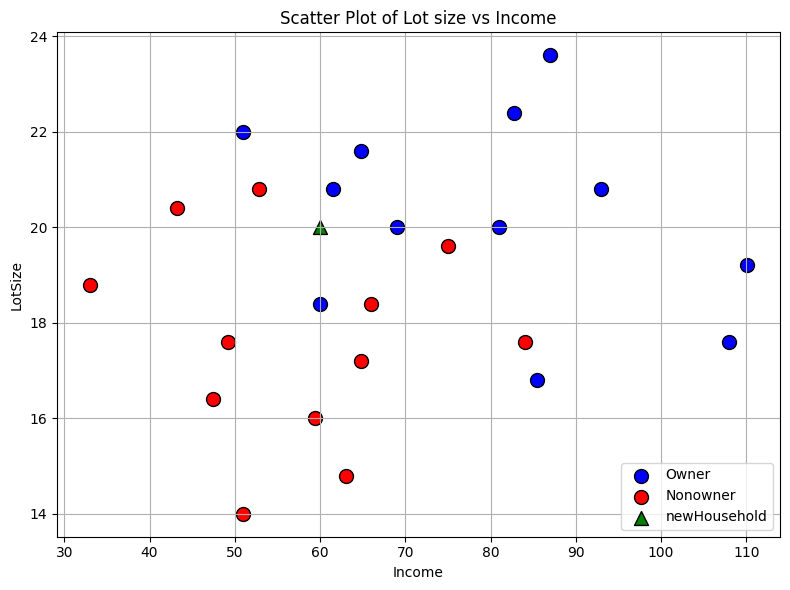

In [19]:
plt.figure(figsize = (8,6))

#Scatter plot for whole data

owners = mower_df[mower_df['Ownership']=='Owner']
nonowners = mower_df[mower_df['Ownership']=='Nonowner']

plt.scatter(owners['Income'], owners['Lot_Size'], s = 100, color ='blue',edgecolors= 'k',label ='Owner')
plt.scatter(nonowners['Income'], nonowners['Lot_Size'], s = 100, color ='red',edgecolors= 'k',label ='Nonowner')
plt.scatter(newHousehold['Income'], newHousehold['Lot_Size'], s = 100, color ='green',edgecolors= 'k',label ='newHousehold', marker= '^')

plt.xlabel('Income')
plt.ylabel('LotSize')
plt.title('Scatter Plot of Lot size vs Income')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

## Train KNN Model

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

trainData, ValidData = train_test_split(mower_df, test_size = 0.4, random_state=26)
scaler = StandardScaler()

#Define predictors and Outcome

predictors =['Income','Lot_Size']
outcome ='Ownership'

scaler.fit(trainData[predictors])

mowerNorm = scaler.transform(mower_df[predictors])
mowerNorm = pd.DataFrame(mowerNorm, columns= ['Income','Lot_Size'])
mowerNorm = pd.concat([mowerNorm, mower_df[[outcome,'Number']]], axis= 1)
mowerNorm


,Income,Lot_Size,Ownership,Number
0,-0.477910,-0.174908,Owner,1
1,0.680365,-0.787085,Owner,2
2,-0.259882,1.049447,Owner,3
3,-0.409776,0.743358,Owner,4
4,0.748499,1.814668,Owner,5
5,1.797760,0.131181,Owner,6
6,1.702373,-0.480996,Owner,7
7,0.557724,1.355535,Owner,8
8,-0.069107,0.437269,Owner,9
9,1.021034,0.743358,Owner,10


In [33]:
newHouseholdNorm = pd.DataFrame(scaler.transform(newHousehold), columns =['Income','Lot_Size'])
newHouseholdNorm

,Income,Lot_Size
0,-0.47791,0.437269


In [34]:
from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(n_neighbors= 3)

trainNorm = mowerNorm.iloc[trainData.index]
trainNorm

,Income,Lot_Size,Ownership,Number
5,1.797760,0.131181,Owner,6
3,-0.409776,0.743358,Owner,4
7,0.557724,1.355535,Owner,8
20,-1.050235,-0.940129,Nonowner,21
18,-0.505164,-1.093174,Nonowner,19
2,-0.259882,1.049447,Owner,3
4,0.748499,1.814668,Owner,5
0,-0.477910,-0.174908,Owner,1
13,-0.804953,0.743358,Nonowner,14
22,-0.886713,-1.858395,Nonowner,23


In [35]:
knn.fit(trainNorm[predictors])

NearestNeighbors(n_neighbors=3)

In [36]:
distances, indices = knn.kneighbors(newHouseholdNorm)

#Extrac and display the data of the nearest Neighbors

nearest_neighbours = trainNorm.iloc[indices[0],:]
nearest_neighbours

,Income,Lot_Size,Ownership,Number
3,-0.409776,0.743358,Owner,4
13,-0.804953,0.743358,Nonowner,14
0,-0.477910,-0.174908,Owner,1
